In [28]:
# Import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Example Data: IRIS
from sklearn.datasets import load_iris
from sklearn import preprocessing
iris = load_iris()
X = preprocessing.scale(iris.data).astype(np.float32)

In [34]:
# Network Parameters
num_input = 4 # Original number of variables
num_hidden = 2 # Encoding variables

# Training Parameters
learning_rate = 0.01
num_steps = 1000

# Define graph variables with initial values
W = tf.Variable(tf.random_normal([num_input, num_hidden]))
X_hash = tf.matmul(X, W)
X_hat = tf.matmul(X_hash, tf.transpose(W))

# Define loss and optimizer
loss = tf.reduce_mean(tf.pow(X - X_hat, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

In [35]:
# Initialize session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

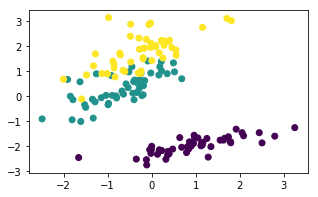

In [130]:
# How does the hash look like.
plt.scatter(X_hash_out[:, 0], 
            X_hash_out[:, 1], 
            c = iris.target)
plt.show()

In [37]:
# Printing parameters
print_every = 100

# Training
for i in range(1, num_steps + 1):  
    # Run one pass of the optimizer
    X_hash_out, loss_out = sess.run([X_hash, loss]) 
    # Display logs per step
    if i % print_every == 0 or i == 1:
        print('Step %i: Loss: %f' % (i, loss_out))

Step 1: Loss: 0.042519
Step 100: Loss: 0.042519
Step 200: Loss: 0.042519
Step 300: Loss: 0.042519
Step 400: Loss: 0.042519
Step 500: Loss: 0.042519
Step 600: Loss: 0.042519
Step 700: Loss: 0.042519
Step 800: Loss: 0.042519
Step 900: Loss: 0.042519
Step 1000: Loss: 0.042519


In [ ]:
sess.close()